# 实现一个通用的、高性能的排序函数

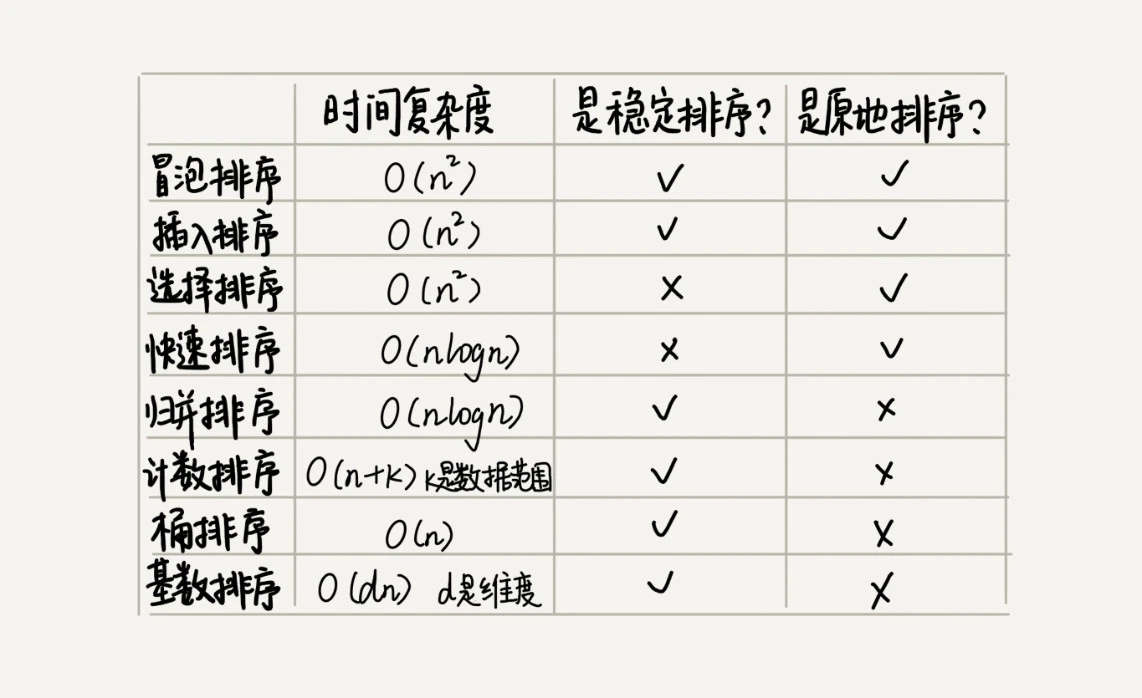

- 如果对小规模数据进行排序，可以选择时间复杂度是 O(n2) 的算法
- 如果对大规模数据进行排序，时间复杂度是 O(nlogn) 的算法更加高效。

所以，为了兼顾任意规模数据的排序，一般都会首选时间复杂度是 O(nlogn) 的排序算法来实现排序函数。 
 
在考虑使用何种算法时需要考虑以下两种情况：
- 时间复杂度
- 空间复杂度

## 优化快速排序
1. 选择合适的分区点（使得被分开的左右元素大体相同）

### 1. 选择合适的分区点

#### 1.1 三数取中法
从区间的首、尾、中间，分别取出一个数，然后对比大小，取这 3 个数的中间值作为分区点。这样每间隔某个固定的长度，取数据出来比较，将中间值作为分区点的分区算法，肯定要比单纯取某一个数据更好。但是，如果要排序的数组比较大，那“三数取中”可能就不够了，可能要“五数取中”或者“十数取中”。

In [18]:
# 三数取中法的快速排序（使用了额外空间，空间复杂度高）
def quick_sort_1(alist):
    if alist == []:
        return []
    else:
        mid = len(alist) // 2
        if alist[0] > alist[mid]:
            alist[0], alist[mid] = alist[mid], alist[0]
        if alist[0] > alist[-1]:
            alist[0], alist[-1] = alist[-1], alist[0]
        if alist[mid] > alist[-1]:
            alist[mid], alist[-1] = alist[-1], alist[mid]
        alist[0], alist[mid] = alist[mid], alist[0]
        pivot = alist[0]
        less = quick_sort_1([l for l in alist[1:] if l < pivot])
        more = quick_sort_1([m for m in alist[1:] if m >= pivot])
    return less + [pivot] + more

In [19]:
result = quick_sort_1([10, 1, 5, 9, 3, 2, 4, 8, 6, 7])
print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
# 三数取中法的快速排序
def quick_sort_2(alist, start, end):
    if start >= end:
        return
    mid = (start + end) // 2
    if alist[start] > alist[mid]:
        alist[start], alist[mid] = alist[mid], alist[start]
    if alist[start] > alist[end]:
        alist[start], alist[end] = alist[end], alist[start]
    if alist[mid] > alist[end]:
        alist[mid], alist[end] = alist[end], alist[mid]
    alist[start], alist[mid] = alist[mid], alist[start]
    pivot = alist[start]
    low = start
    high = end
    while low < high:
        while low < high and alist[high] >= pivot:
            high -= 1
        alist[low] = alist[high]
        while low < high and alist[low] <= pivot:
            low += 1
        alist[high] = alist[low]
    alist[low] = pivot
    quick_sort_2(alist, start, low - 1)
    quick_sort_2(alist, low + 1, end)
    return alist

In [17]:
result = quick_sort_2([10, 1, 5, 9, 3, 2, 4, 8, 6, 7], 0, 9)
print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### 1.2 随机法
随机法就是每次从要排序的区间中，随机选择一个元素作为分区点。这种方法并不能保证每次分区点都选的比较好，但是从概率的角度来看，也不大可能会出现每次分区点都选得很差的情况，所以平均情况下，这样选的分区点是比较好的。时间复杂度退化为最糟糕的 O(n2) 的情况，出现的可能性不大。

In [20]:
# 随机发的快速排序
import random
def quick_sort_3(alist, start, end):
    if start >= end:
        return
    mid = random.randint(start, end)
    alist[start], alist[mid] = alist[mid], alist[start]
    pivot = alist[start]
    low = start
    high = end
    while low < high:
        while low < high and alist[high] >= pivot:
            high -= 1
        alist[low] = alist[high]
        while low < high and alist[low] <= pivot:
            low += 1
        alist[high] = alist[low]
    alist[low] = pivot
    quick_sort_3(alist, start, low - 1)
    quick_sort_3(alist, low + 1, end)
    return alist

In [21]:
result = quick_sort_2([10, 1, 5, 9, 3, 2, 4, 8, 6, 7], 0, 9)
print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
